# Pokemon Dataset Analysis

### Import des modules nécessaires

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

### Récupération du dataset

In [4]:
df = pd.read_csv('pokemon.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1118 non-null   object 
 1   pokedex_number                 1118 non-null   int64  
 2   abilities                      1118 non-null   object 
 3   typing                         1118 non-null   object 
 4   hp                             1118 non-null   int64  
 5   attack                         1118 non-null   int64  
 6   defense                        1118 non-null   int64  
 7   special_attack                 1118 non-null   int64  
 8   special_defense                1118 non-null   int64  
 9   speed                          1118 non-null   int64  
 10  height                         1118 non-null   int64  
 11  weight                         1118 non-null   int64  
 12  genus                          1118 non-null   o

### Création d'un subdataset

In [8]:
df2 = df[['name','typing','hp','attack','defense','special_attack','special_defense','speed','gen_introduced','legendary']]

In [10]:
# Split la colonne typing en deux colonnes type1 et type2
df2[['type1','type2']] = df.typing.str.split("~",expand=True)
# Remplissage de type2 pour les pokemon n'ayant qu'un seul type
df2['type2'].fillna(df2['type1'],inplace=True)
# Suppression de la colonne typing obsolete
df2 = df2.drop(["typing"],axis=1)
# Rajout de la colonne total_stat = somme des stats
df2['total_stat'] = df[['hp','attack','defense','special_attack','special_defense','speed']].sum(axis=1)
df2.head()

C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,type1,type2,total_stat
0,Bulbasaur,45,49,49,65,65,45,1,False,Grass,Poison,318
1,Ivysaur,60,62,63,80,80,60,1,False,Grass,Poison,405
2,Venusaur,80,82,83,100,100,80,1,False,Grass,Poison,525
3,Venusaur Gmax,80,82,83,100,100,80,1,False,Grass,Poison,525
4,Venusaur Mega,80,100,123,122,120,80,1,False,Grass,Poison,625


In [14]:
# Vérification des isnull
df2.isnull().sum()

name               0
hp                 0
attack             0
defense            0
special_attack     0
special_defense    0
speed              0
gen_introduced     0
legendary          0
type1              0
type2              0
total_stat         0
dtype: int64

In [15]:
round(df2.describe())

,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,total_stat
count,1118.0,1118.0,1118.0,1118.0,1118.0,1118.0,1118.0,1118.0
mean,70.0,81.0,75.0,73.0,73.0,69.0,4.0,441.0
std,27.0,32.0,31.0,32.0,28.0,30.0,2.0,120.0
min,1.0,5.0,5.0,10.0,20.0,5.0,1.0,175.0
25%,50.0,55.0,50.0,50.0,50.0,45.0,2.0,330.0
50%,68.0,78.0,70.0,65.0,70.0,67.0,4.0,460.0
75%,81.0,100.0,90.0,95.0,90.0,90.0,6.0,515.0
max,255.0,190.0,250.0,194.0,250.0,200.0,8.0,1125.0


### Exploration basique de notre jeu de données

In [26]:
# Pokemon ayant le min d'hp
df3 = df2[(df2['attack'] > 180)]
df4 = df2[(df2['type1'] == 'Bug')]
df4

,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,type1,type2,total_stat
16,Caterpie,45,30,35,20,20,45,1,False,Bug,Bug,195
17,Metapod,50,20,55,25,25,30,1,False,Bug,Bug,205
18,Butterfree,60,45,50,90,80,70,1,False,Bug,Flying,395
19,Butterfree Gmax,60,45,50,90,80,70,1,False,Bug,Flying,395
20,Weedle,40,35,30,20,20,50,1,False,Bug,Poison,195
...,...,...,...,...,...,...,...,...,...,...,...,...
980,Pheromosa,71,137,37,137,37,151,7,False,Bug,Fighting,570
1018,Blipbug,25,20,20,25,45,45,8,False,Bug,Bug,180
1019,Dottler,50,35,80,50,90,30,8,False,Bug,Psychic,335
1020,Orbeetle,60,45,110,80,120,90,8,False,Bug,Psychic,505


In [228]:
#iloc works on the positions in the index (so it only takes integers).
print(df2.iloc[0])

name               Bulbasaur
hp                        45
attack                    49
defense                   49
special_attack            65
special_defense           65
speed                     45
gen_introduced             1
legendary              False
type1                  Grass
type2                 Poison
total_stat               318
Name: 0, dtype: object


### VIsualisation sur les statistiques des pokemon

<AxesSubplot:xlabel='type1', ylabel='total_stat'>

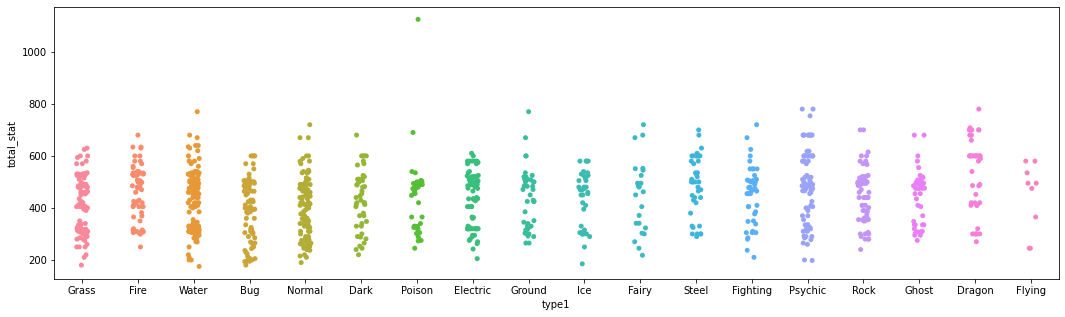

In [11]:
# Total_stat / type1
# Stripplot
fig, ax = plt.subplots(figsize=(18,5))
sns.stripplot(data=df2,x='type1',y='total_stat')

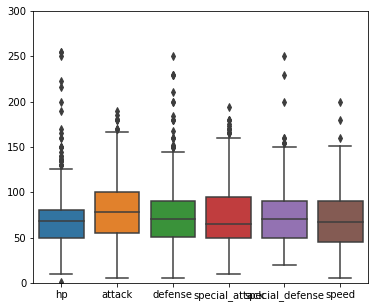

In [230]:
fig, ax = plt.subplots(figsize=(6,5))
# Boxplot
sns.boxplot(data=df2[['hp','attack','defense','special_attack','special_defense','speed']])
plt.ylim(0,300)  #change the scale of y axix
plt.show()

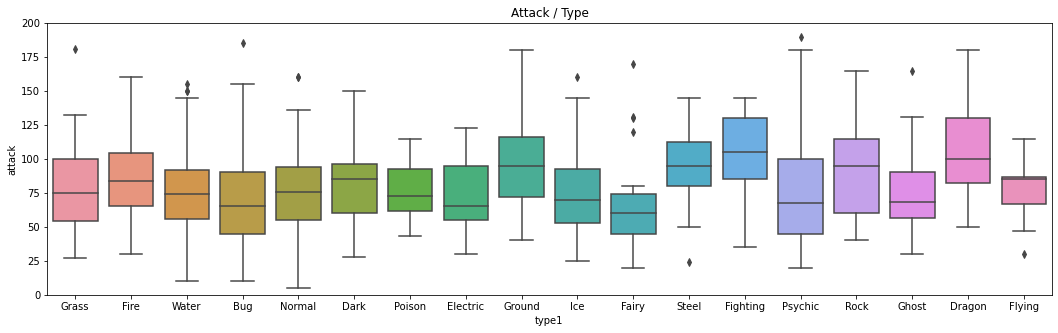

In [231]:
plt.subplots(figsize = (18,5))
plt.title('Attack / Type')
# Boxplot
sns.boxplot(x = "type1", y = "attack",data = df2)
plt.ylim(0,200)
plt.show()

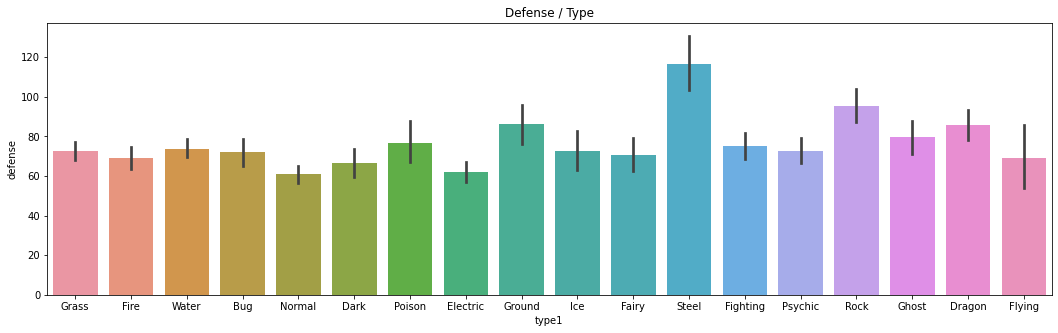

In [232]:
plt.subplots(figsize = (18,5))
plt.title('Defense / Type')
# Barplot
sns.barplot(x = "type1", y = "defense",data = df2)
plt.show()

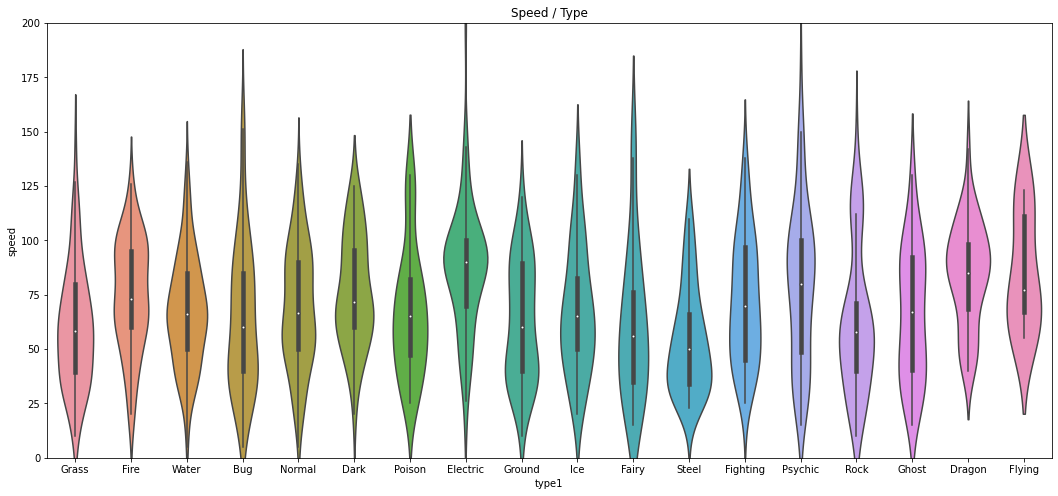

In [233]:
plt.subplots(figsize = (18,8))
plt.title('Speed / Type')
# Violinplot
sns.violinplot(x = "type1", y = "speed",data = df2)
plt.ylim(0,200)
plt.show()

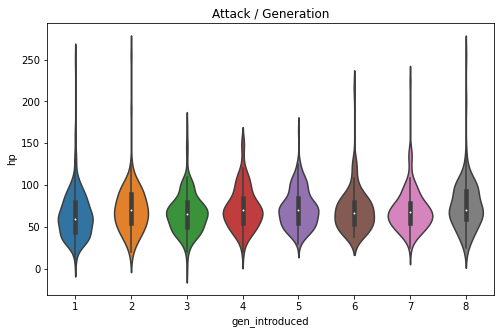

In [263]:
# Distribution de la stat de hp par generation
plt.subplots(figsize = (8,5))
plt.title('Attack / Generation')
# Violinplot
sns.violinplot(x = "gen_introduced", y = "hp",data = df2)
plt.show()

C:\Users\33781\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

[Text(0.5, 1.0, 'Distribution des statistiques')]

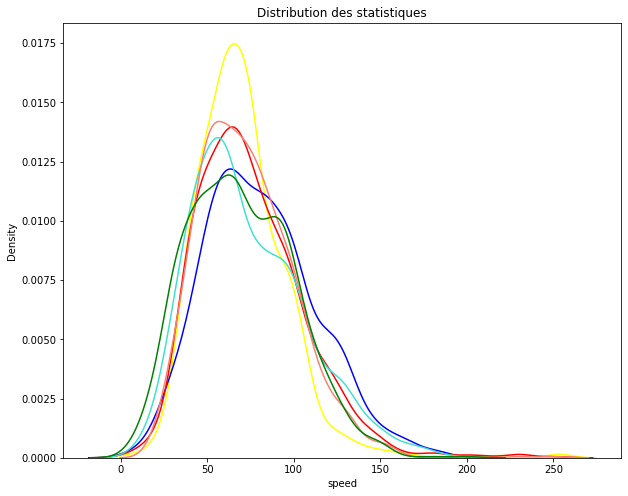

In [262]:
# Distribution de nos statistiques
fig, ax = plt.subplots(figsize=(10,8))
# Distplot
distrib = sns.distplot(df2['hp'],color='yellow',hist=False,ax=ax)
distrib = sns.distplot(df2['attack'],color='blue',hist=False,ax=ax)
distrib = sns.distplot(df2['defense'],color='red',hist=False,ax=ax)
distrib = sns.distplot(df2['special_attack'],color='turquoise',hist=False,ax=ax)
distrib = sns.distplot(df2['special_defense'],color='salmon',hist=False,ax=ax)
distrib = sns.distplot(df2['speed'],color='green',hist=False,ax=ax)
distrib.set(title='Distribution des statistiques')

[Text(0.5, 1.0, 'Correlations entre statistiques pokemon')]

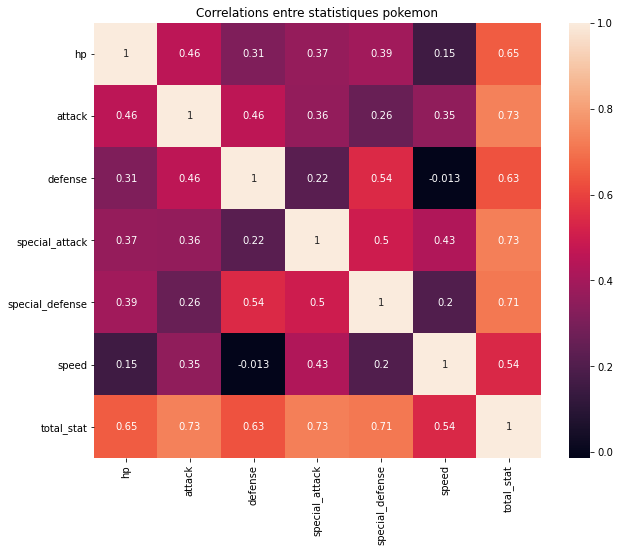

In [252]:
# Recherche de correlations entre stats
dfcor = df2[["hp","attack","defense","special_attack","special_defense","speed","total_stat"]]
fig, ax = plt.subplots(figsize=(10,8))
# Heatmat
corel = sns.heatmap(dfcor.corr(),annot=True,ax=ax)
corel.set(title='Correlations entre statistiques pokemon')

### Visualisation sur les pokemon legendaires

Les legendaires meritent-ils leur titre au niveau stats ?

C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points c

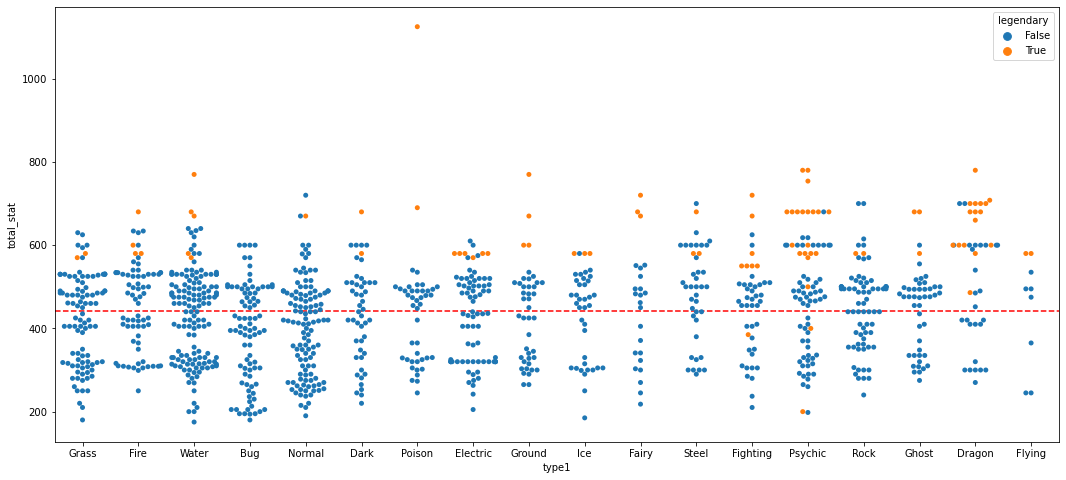

In [235]:
fig, ax = plt.subplots(figsize=(18,8))
# Swarmplot
sns.swarmplot(x='type1',y='total_stat',data=df2,hue='legendary') # this plot shows the points belonging to individual pokemons
plt.axhline(df2['total_stat'].mean(),color='red',linestyle='dashed')
plt.show()

C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


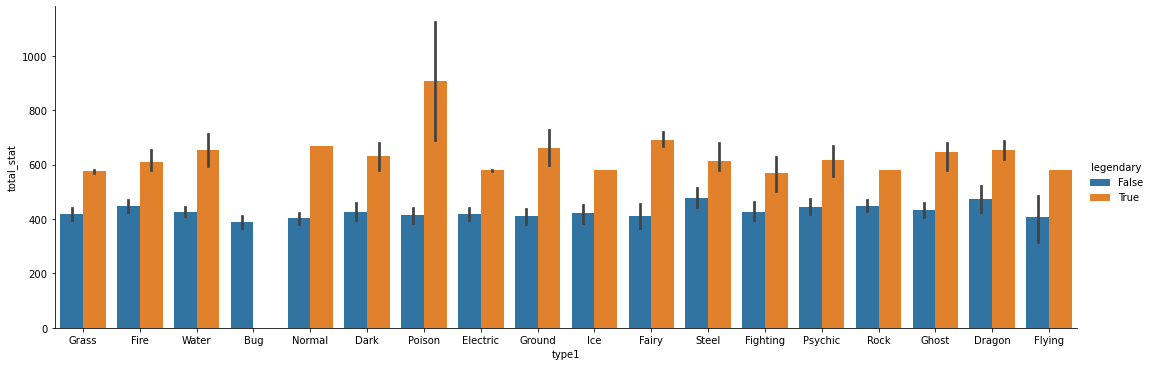

In [278]:
# Factorplot
sns.factorplot(x='type1',y='total_stat',hue='legendary',data=df2,kind='bar',aspect=3,size=5)

### Visualisation sur les types de pokemon au fil des genenerations

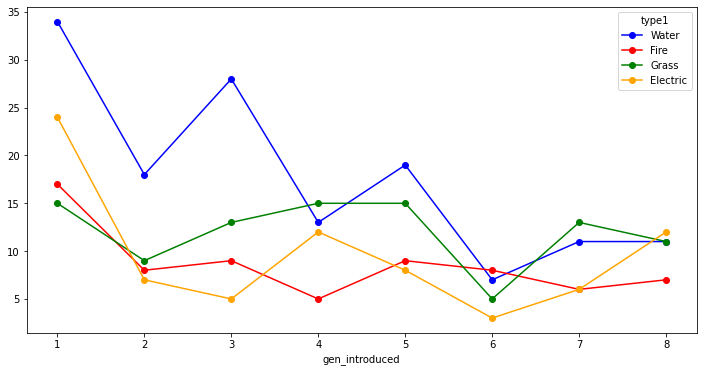

In [237]:
# Il y a une tentative d'equilibrage de la representation des types au fil des generations
a=df2.groupby(['gen_introduced','type1']).count().reset_index()
a=a[['gen_introduced','type1','total_stat']]
a=a.pivot('gen_introduced','type1','total_stat')
a[['Water','Fire','Grass','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Text(0.5, 1.0, 'Pokemon / Type1')

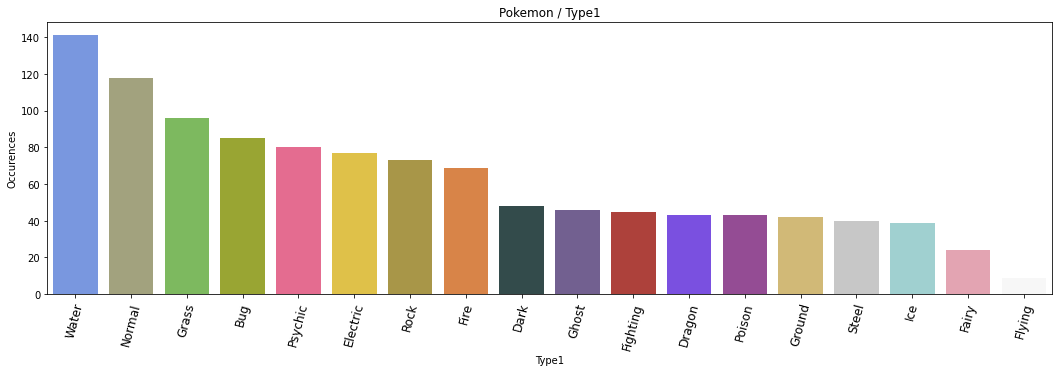

In [244]:
# On en est où en Gen8 sur la representation des types ?
fig, ax = plt.subplots(figsize=(18,5))
type1 = pd.value_counts(df2['type1'])
colortype =  [
    '#6890F0',  # Water
    '#A8A878',  # Normal
    '#78C850',  # Grass
    '#A8B820',  # Bug
    '#F85888',  # Psychic
    '#F8D030',  # Electric
    '#B8A038',  # Rock
    '#F08030',  # Fire
    '#2F4F4F',  # Dark
    '#705898',  # Ghost
    '#C03028',  # Fighting
    '#7038F8',  # Dragon
    '#A040A0',  # Poison
    '#E0C068',  # Ground
    '#C7C7C7',  # Steel
    '#98D8D8',  # Ice
    '#EE99AC',  # Fairy
    '#F7F7F7'   # Flying          
            ]
bar = sns.barplot(x=type1.index,y=type1,data=df2,palette=colortype,ax=ax)
bar.set_xticklabels(bar.get_xticklabels(),rotation=75,fontsize=12)
bar.set(xlabel='Type1',ylabel='Occurences')
bar.set_title('Pokemon / Type1')

### Visualisation pour comparer le potentiel de deux pokemon

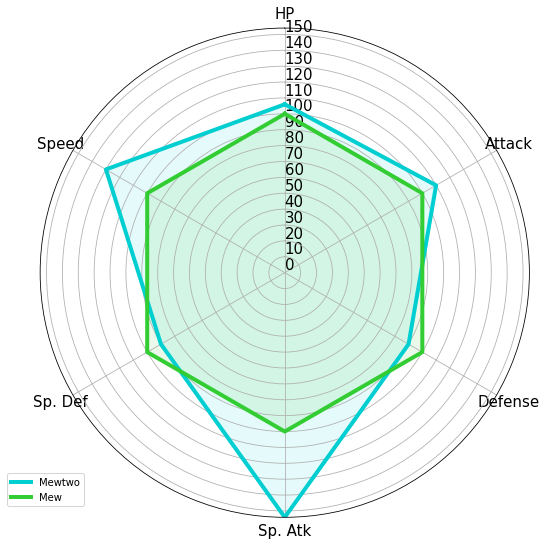

In [264]:
# Chxoi de nos deux pokemon selon leur index dans df2
pok1=df2.iloc[218]
pok2=df2.iloc[221]

# Figure
fig = plt.figure(figsize=(9,9))
color1='darkturquoise'
color2='limegreen'

# Data
dfcomp = pd.DataFrame({
'group': [pok1['name'],pok2['name']],
'HP': [pok1["hp"], pok2["hp"]],
'Attack': [pok1["attack"], pok2["attack"]],
'Defense': [pok1["defense"], pok2["defense"]],
'Sp. Atk': [pok1["special_attack"], pok2["special_attack"]],
'Sp. Def': [pok1["special_defense"], pok2["special_defense"]],
'Speed': [pok1["speed"], pok2["speed"]]
})

# Maximum des stats pour l'échelle du radar chart
maximum=max([pok1["attack"], pok2["attack"],pok1["defense"], pok2["defense"],pok1["special_attack"], pok2["special_attack"],
pok1["special_defense"], pok2["special_defense"],pok1["speed"], pok2["speed"]])
 
# 1: Background
 
# Variables
categories=['HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed']
N = len(categories)
aa=[]
aaa=[]
for i in range(maximum):
    aa.append(i*10)
    aaa.append(str(i*10))
    
# Angles entre axe/stats sur le radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialisation
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Axe = variable + labeling
plt.xticks(angles[:-1], categories,size=15,color="black")
ax.set_rlabel_position(0)
plt.yticks(aa, aaa, color="black", size=15)
plt.ylim(0,maximum)

#  2: Ajout des plots
 
# Pokemon 1
values=dfcomp.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid', label=pok1['name'],color=color1)
ax.fill(angles, values, color1, alpha=0.1)
 
# Pokemon 2
values=dfcomp.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid', label=pok2['name'],color=color2)
ax.fill(angles, values, color2, alpha=0.1)
 
# Legende
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))